In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
# if "../" not in sys.path:
#   sys.path.append("../")

In [2]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """

    # # initialize
    # rewards = np.zeros(101) # 0 to 100
    # rewards[100] = 1 # rewards for s=100 or larger is 1, otherwise is zero
    V = np.zeros(101) # Value for state 1 to 99
    rewards = np.zeros(101)
    rewards[100] = 1
    policy = np.zeros(101) # optimal action for 99 states
    epoch = 0


    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.

        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state.
            rewards: The reward vector.

        Returns:
            A vector containing the expected value of each action.
            Its length equals to the number of actions.
        """
        #print(min(s, 100-s))
        a = np.arange(0, min(s, 100-s) + 1)

        A = np.zeros(a.shape)
        for i in range(len(A)):
            A[i] = discount_factor*((V[s-a[i]])+rewards[s-a[i]]) *(1-p_h)\
                +  discount_factor*(V[s+a[i]]+rewards[s+a[i]])*p_h

        return A

    while(True):
        Delta = 0
        for s in range(1, 100): # 1 to 99
            A = one_step_lookahead(s, V, rewards)
            best_a_idx = np.argmax(A) # choose the best action
            policy[s] = best_a_idx # how many bet the gambler stake
            v_prime = A[best_a_idx]
            Delta = max(np.abs(v_prime-V[s]), Delta)
            V[s] = v_prime
        epoch+=1
        print("epoch: {0}, Delta: {1}".format(epoch, Delta))
        if Delta < theta:
            print("finish value iteration training")
            break

    return policy, V

In [3]:
policy, v = value_iteration_for_gamblers(0.25)
print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

epoch: 1, Delta: 0.822021484375
epoch: 2, Delta: 0.190673828125
epoch: 3, Delta: 0.042724609375
epoch: 4, Delta: 0.01068115234375
epoch: 5, Delta: 0.0026702880859375
epoch: 6, Delta: 0.000667572021484375
epoch: 7, Delta: 0.00011587142944335938
epoch: 8, Delta: 2.1725893020629883e-05
finish value iteration training
Optimized Policy:
[ 0.  1.  0.  3.  4.  0.  0.  7.  8.  0. 10. 11.  0. 12. 11.  0.  9.  0.
  7.  6.  0.  0.  3.  0.  0.  0.  0.  2.  0.  4.  5.  0.  7.  8.  9.  0.
 11.  0.  0.  0. 10.  9.  8.  7.  0.  5.  4.  0.  2.  1.  0.  0.  2.  0.
  4.  5.  0.  7.  8.  9.  0. 11.  0.  0.  0. 10.  9.  8.  7.  0.  5.  4.
  0.  2.  1.  0.  1.  2.  0.  4.  0.  0.  0.  8.  9. 10.  0. 12. 12.  0.
  0.  0.  8.  0.  6.  0.  4.  3.  2.  1.  0.]

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02

Text(0.5, 1.0, 'Expected Value for different capital')

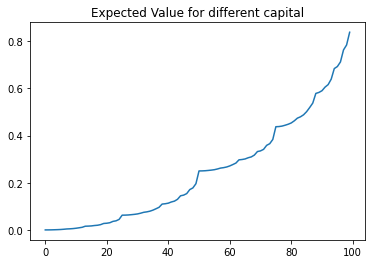

In [10]:
%matplotlib inline
plt.plot(v[:100])
plt.title('Expected Value for different capital')

In [ ]:
plt.bar(np.arange(100),policy[:100],align='center', alpha=0.5)
plt.title('Stake money using optimal policy')

Text(0.5, 1.0, 'Stake money using optimal policy')

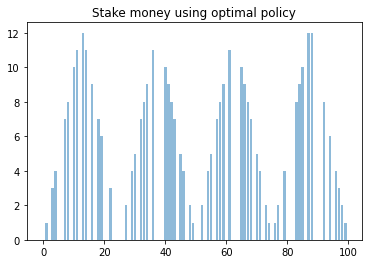